## 預測信用卡詐騙

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = df.drop(['Time', 'Amount', 'Class'], axis=1), df['Class']

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型訓練
clf = LogisticRegression().fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

# 準確率
accuracy_score(y_test, y_pred)


0.999283727985169

In [5]:
# 取得混淆矩陣的4個格子
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(71072, 10, 41, 79)

In [6]:
print(f'準確率(Accuracy)={(tn+tp) / (tn+fp+fn+tp)}')
print(f'精確率(Precision)={(tp) / (fp+tp)}')
print(f'召回率(Recall)={(tp) / (fn+tp)}')
print(f'F1 score={(2*tp) / (2*tp+fp+fn)}')

準確率(Accuracy)=0.999283727985169
精確率(Precision)=0.8876404494382022
召回率(Recall)=0.6583333333333333
F1 score=0.7559808612440191


# 繪製ROC曲線

### 接收操作特徵圖 (Receiver Operator Characteristic, ROC)

在各種決策門檻 (decision threshold) 下，比較『真陽率』(True Positive Rate；TPR) 與『假陽率』(False Positive Rate；FPR) 間的變化。

### 曲線下面積 (Area Under the Curve, AUC)

AUC 面積大小可視為模型的效能表現，常用於比較多個模型的效能表現。

對角線為隨機猜測的效能，低於對角線表示模型效能比隨機猜測還差。
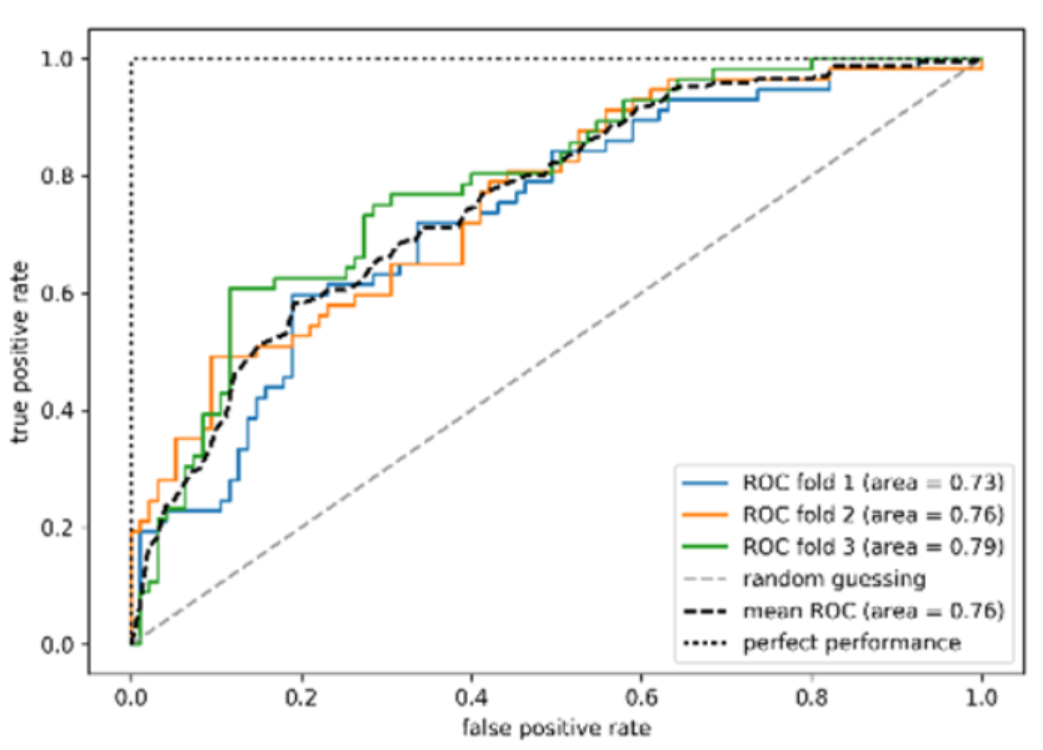

在 ROC 曲線中，橫軸是 FPR，縱軸是 TPR。ROC 曲線展示了模型在不同決策門檻下的 TPR 與 FPR 之間的權衡。

### AUC（曲線下面積）

AUC 是 ROC 曲線下面積，範圍從 0 到 1。AUC 的值可以解釋為模型在隨機挑選一對正負樣本時，正樣本得分高於負樣本的概率。

- **AUC = 1.0**：模型的分類性能非常好，能夠完美地將所有正負樣本區分開來。
- **0.5 < AUC < 1.0**：模型具有一定的區分能力，AUC 值越高，模型性能越好。
- **AUC = 0.5**：模型的分類性能與隨機猜測無異。
- **AUC < 0.5**：模型的分類性能比隨機猜測還差，這種情況通常意味著模型存在嚴重問題。

### AUC 的優點

1. **不受類別不平衡的影響**：AUC 是對模型整體性能的綜合評估，不會因類別不平衡而受到極端值的影響。
2. **直觀易理解**：AUC 提供了一個簡單明了的數值，可以直接用來比較不同模型的性能。


## ROC 曲線繪製
- 根據每個測試樣本屬於P的機率值從大到小排序。
- 從高到低，依次將Score值作為決策門檻。
- 統計P及N總數，Y軸畫P格，X軸畫N格，如下圖，5個P ，15個N。
- 逐步調降Score，遇P往上，遇N往右。
-  Score 是模型對某個樣本屬於P的預測概率。例如，某個樣本的 Score 為 0.8，表示模型認為該樣本屬於P的機率為 80%。
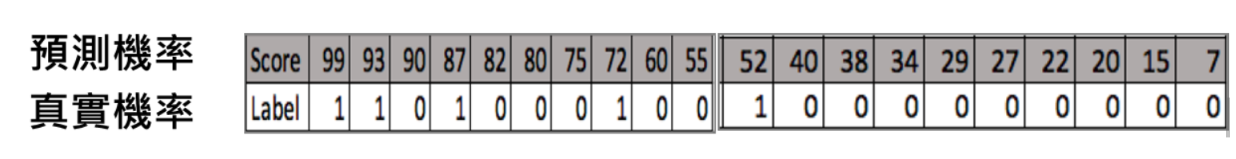
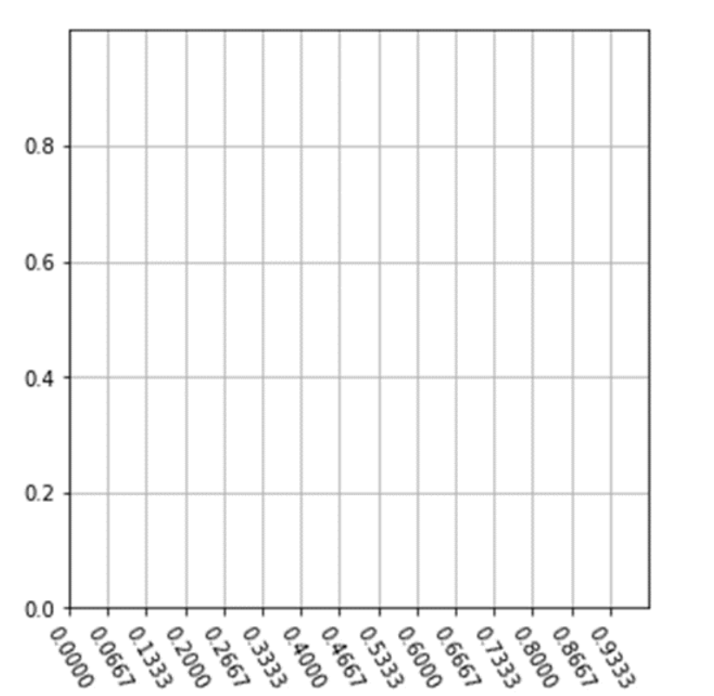
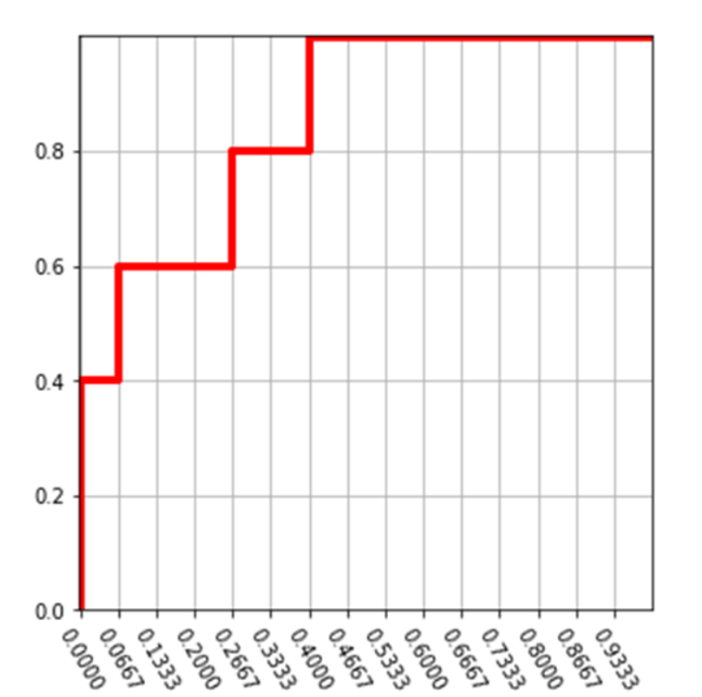

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
df = pd.read_csv("roc_test_data.csv")
df
df.sort_values(by='predict', ascending=False)

,predict,actual
4,0.99,1
17,0.82,1
7,0.80,1
13,0.73,0
2,0.72,1
16,0.71,1
15,0.65,1
10,0.56,1
11,0.48,0
5,0.44,1


## Scikit-Learn 作法

In [13]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])

print(f'FP:\n{fpr}\n\nTP:\n{tpr}\n\nthreshold:{threshold}')

FP:
[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ]

TP:
[0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ]

threshold:[ inf 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


Text(0.5, 0, 'FP')

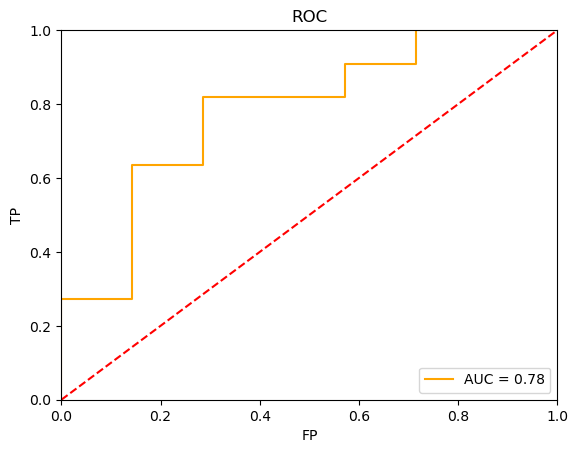

In [14]:
auc1 = auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TP')
plt.xlabel('FP')

# MinMaxScaler

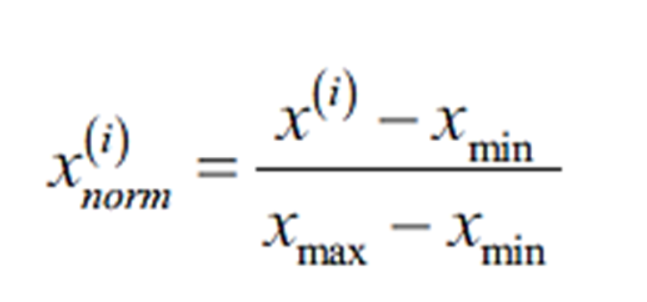

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

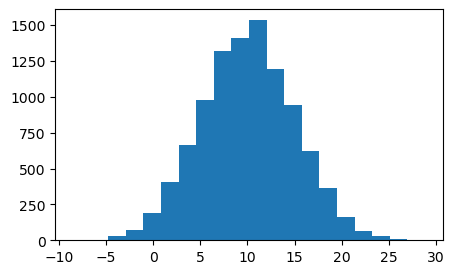

In [ ]:
# 常態分配
data = np.random.normal(10, 5, 10000)
plt.figure(figsize=(5,3));
plt.hist(data, 20)
plt.show()

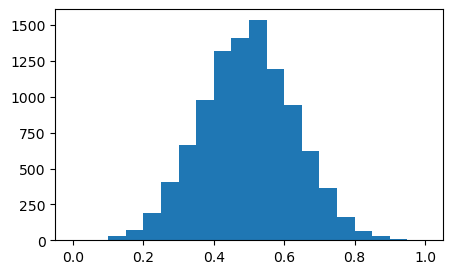

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_new=scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new, 20)
plt.show()

# StandardScaler

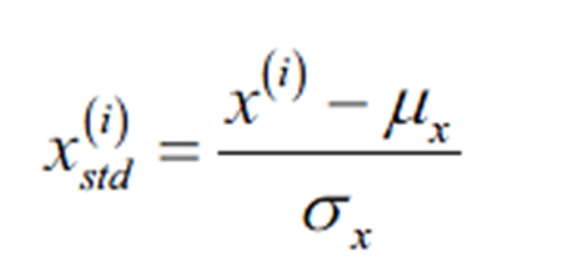

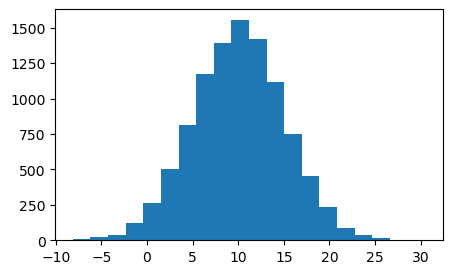

In [22]:
# 常態分配
data = np.random.normal(10, 5, 10000)
plt.figure(figsize=(5,3));
plt.hist(data, 20)
plt.show()

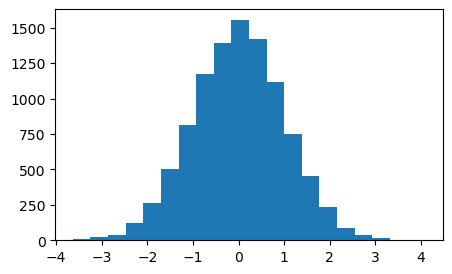

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new=scaler.fit_transform(data.reshape(-1,1))
plt.figure(figsize=(5,3))
plt.hist(data_new, 20)
plt.show()

# 多重共線性(Multicollinearity)


In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

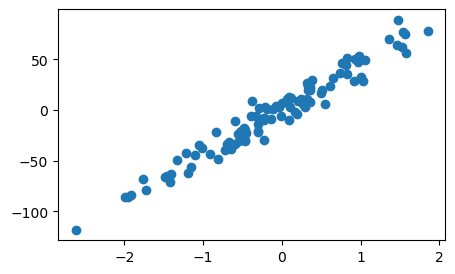

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.show()

## 迴歸

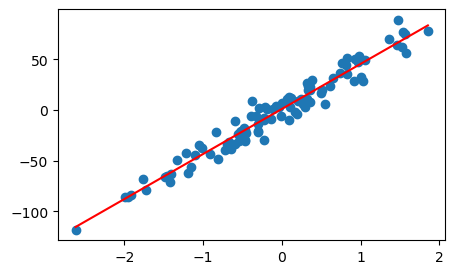

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
X_pred = np.linspace(np.min(X.reshape(-1)), np.max(X.reshape(-1)), 20)
y_pred = X_pred * model.coef_[0] + model.intercept_
plt.figure(figsize=(5,3));
plt.scatter(X, y)
plt.plot(X_pred, y_pred, c='red')
plt.show()

In [28]:
model.coef_

array([44.43716999])

In [29]:
X2 = X.copy()
X_new = np.hstack((X, X2))
print(X_new.shape)
print(X_new)

(100, 2)
[[ 0.93128012  0.93128012]
 [ 0.08704707  0.08704707]
 [-1.05771093 -1.05771093]
 [ 0.31424733  0.31424733]
 [-0.47917424 -0.47917424]
 [ 0.64768854  0.64768854]
 [-0.46341769 -0.46341769]
 [ 0.54256004  0.54256004]
 [ 0.61167629  0.61167629]
 [ 1.0035329   1.0035329 ]
 [ 0.8219025   0.8219025 ]
 [ 1.53803657  1.53803657]
 [ 0.73846658  0.73846658]
 [-0.21967189 -0.21967189]
 [-0.8084936  -0.8084936 ]
 [ 0.09176078  0.09176078]
 [-1.95967012 -1.95967012]
 [ 0.51326743  0.51326743]
 [ 1.03099952  1.03099952]
 [-2.6197451  -2.6197451 ]
 [ 0.49671415  0.49671415]
 [ 0.09707755  0.09707755]
 [-0.46572975 -0.46572975]
 [ 0.91540212  0.91540212]
 [ 1.56464366  1.56464366]
 [ 1.46564877  1.46564877]
 [-0.60063869 -0.60063869]
 [-0.03582604 -0.03582604]
 [-0.60170661 -0.60170661]
 [-1.19620662 -1.19620662]
 [ 0.35711257  0.35711257]
 [ 0.37569802  0.37569802]
 [ 0.26105527  0.26105527]
 [-0.5297602  -0.5297602 ]
 [-0.90802408 -0.90802408]
 [ 0.19686124  0.19686124]
 [-0.29900735 -0.29

In [31]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_new, y)
model2.coef_

array([22.218585, 22.218585])

## 無共線

In [32]:
y_pred = 10 * model.coef_[0] + model.intercept_
print(y_pred)

445.5368152430766


## 有共線

In [35]:
X_test = [[10, 0]]#因為共線性所以設為0對結果影響很大
model2.predict(X_test)

array([223.35096528])

## Variance Inflation Factor(VIF)
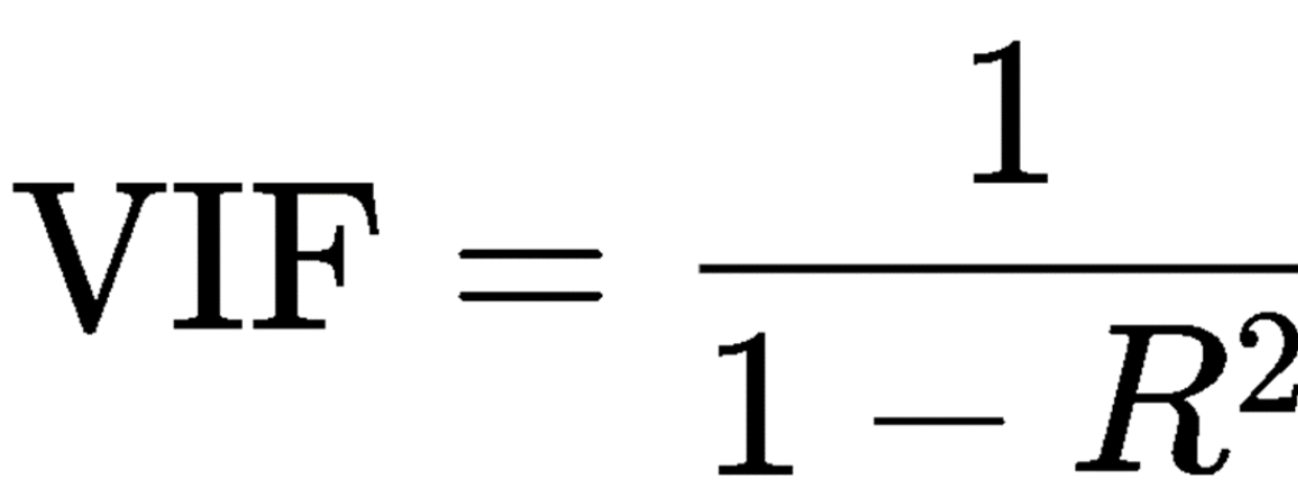
R^2越靠近1表示X2與X3越能表示X1 表示共線機率大

VIF越大表示共線性越大

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = pd.read_csv("BMI.csv")
data["Gender"] = data["Gender"].map({"Male":0,"Female":1})
data.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [ ]:
X = data[["Gender","Height","Weight"]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
#VIF 值大於 5 或 10 通常會被認為存在多重共線性。
#高 VIF 值意味著該特徵可能可以由其他特徵推導出
#Height與Weight 有高度共線性 可以轉換成bmi
vif_data["VIF"] = [variance_inflation_factor(X.values,i)   for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0  Gender   2.028864
1  Height  11.623103
2  Weight  10.688377


## 特徵選取演算法

常見演算法：


Sequential Feature Selection(SFS)。循序加入最具影響力的特徵，直到特徵數達到要求的個數。


Recursive Feature Elimination (RFE) 。每次都移除最不重要的特徵

Permutation Feature Importance(PFI)。數據中某一特徵的值隨機打亂，其他特徵保持不變

# Sequential Feature Selection(SFS)

In [47]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [48]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [52]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [53]:
clf.score(X_test_std, y_test)

0.9887640449438202

## 測試選取3個特徵的所有組合

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=11)#使用最近鄰打分數
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)#選三個
sfs.fit(X_train_std, y_train)
sfs.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True, False, False])

In [55]:
# 特徵選取名稱
column_list = np.array(X.columns.to_list())
column_list[sfs.get_support()]

array(['flavanoids', 'color_intensity', 'hue'], dtype='<U28')